<a href="https://colab.research.google.com/github/ellenozores/analise-estatistica-r/blob/main/desempenhoAlunosR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalação dos pacotes
install.packages("readr")
install.packages("knitr")
install.packages("kableExtra")
library("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’




In [ ]:
#ler o CSV escolhido
dados <- read.csv("school perfomance.csv", sep = ";", header = TRUE)
head(dados)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [ ]:
#Ver o nome das colunas do csv
tolower(names(dados))

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "pstatus"    "medu"       "fedu"       "mjob"       "fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "dalc"       "walc"       "health"     "absences"  
[31] "g1"         "g2"         "g3"

In [ ]:
#Deixar todos os nomes em minusculas
names(dados) <- tolower(names(dados))
head(dados)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


## **Transformação dos Dados**

In [ ]:
#Transformar os dados qualitativos nominais -> factor
dados$school <- factor(dados$school)
dados$sex <- factor(dados$sex)
dados$address <- factor(dados$address)
dados$famsize <- factor(dados$famsize)
dados$pstatus <- factor(dados$pstatus)
dados$mjob <- factor(dados$mjob)
dados$fjob <- factor(dados$fjob)
dados$reason <- factor(dados$reason)
dados$guardian <- factor(dados$guardian)
dados$schoolsup <- factor(dados$schoolsup)
dados$famsup <- factor(dados$famsup)
dados$paid <- factor(dados$paid)
dados$activities <- factor(dados$activities)
dados$nursery <- factor(dados$nursery)
dados$higher <- factor(dados$higher)
dados$internet <- factor(dados$internet)
dados$romantic <- factor(dados$romantic)
head(dados)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [ ]:
#Transformar os dados qualitativo ordinal em factor ordenado
dados$medu <- factor(as.numeric(as.character(dados$medu)),
                     levels = c(0,1,2,3,4),
                     labels = c("nenhuma", "primario", "5a9", "medio", "superior"),
                     ordered = TRUE)

dados$fedu <- factor(as.numeric(as.character(dados$fedu)),
                     levels = c(0,1,2,3,4),
                     labels = c("nenhuma", "primario", "5a9", "medio", "superior"),
                     ordered = TRUE)

dados$traveltime <- factor(as.numeric(as.character(dados$traveltime)),
                           levels = c(1,2,3,4),
                           labels = c("<15m", "15-30m", "30-60m", ">1h"),
                           ordered = TRUE)

#dados$studytime <- factor(as.numeric(as.character(dados$studytime)),
                          #levels = c(1,2,3,4),
                          #labels = c("<2h", "2-5h", "5-10h", ">10h"),
                          #ordered = TRUE)

dados$failures <- factor(as.numeric(as.character(dados$failures)),
                         levels = c(0,1,2,3),
                         labels = c("0", "1", "2", "3+"),
                         ordered = TRUE)

dados$famrel <- factor(as.numeric(as.character(dados$famrel)),
                       levels = 1:5,
                       labels = c("muito_ruim", "ruim", "regular", "boa", "excelente"),
                       ordered = TRUE)

dados$freetime <- factor(as.numeric(as.character(dados$freetime)),
                         levels = 1:5,
                         labels = c("muito_pouco", "pouco", "regular", "muito", "excessivo"),
                         ordered = TRUE)

#dados$goout <- factor(as.numeric(as.character(dados$goout)),
                      #levels = 1:5,
                      #labels = c("muito_pouco", "pouco", "regular", "muito", "excessivo"),
                      #ordered = TRUE)

dados$dalc <- factor(as.numeric(as.character(dados$dalc)),
                     levels = 1:5,
                     labels = c("muito_baixo", "baixo", "moderado", "alto", "muito_alto"),
                     ordered = TRUE)

dados$walc <- factor(as.numeric(as.character(dados$walc)),
                     levels = 1:5,
                     labels = c("muito_baixo", "baixo", "moderado", "alto", "muito_alto"),
                     ordered = TRUE)

dados$health <- factor(as.numeric(as.character(dados$health)),
                       levels = 1:5,
                       labels = c("muito_ruim", "ruim", "regular", "boa", "excelente"),
                       ordered = TRUE)




In [ ]:
str(dados)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ medu      : Ord.factor w/ 5 levels "nenhuma"<"primario"<..: 5 2 2 5 4 5 3 5 4 4 ...
 $ fedu      : Ord.factor w/ 5 levels "nenhuma"<"primario"<..: 5 2 2 3 4 4 3 5 3 5 ...
 $ mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: Ord.factor w/ 4 levels "<15m"<"15-30m"<..: 2 1 1 1 1 1 

In [ ]:
head(dados)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<ord>,<ord>,<fct>,<fct>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,superior,superior,at_home,teacher,⋯,boa,regular,muito,muito_baixo,muito_baixo,regular,6,5,6,6
2,GP,F,17,U,GT3,T,primario,primario,at_home,other,⋯,excelente,regular,regular,muito_baixo,muito_baixo,regular,4,5,5,6
3,GP,F,15,U,LE3,T,primario,primario,at_home,other,⋯,boa,regular,pouco,baixo,moderado,regular,10,7,8,10
4,GP,F,15,U,GT3,T,superior,5a9,health,services,⋯,regular,pouco,pouco,muito_baixo,muito_baixo,excelente,2,15,14,15
5,GP,F,16,U,GT3,T,medio,medio,other,other,⋯,boa,regular,pouco,muito_baixo,baixo,excelente,4,6,10,10
6,GP,M,16,U,LE3,T,superior,medio,services,other,⋯,excelente,muito,pouco,muito_baixo,baixo,excelente,10,15,15,15


In [ ]:
summary(dados$school)
summary(dados$sex)
summary(dados$address)
summary(dados$famsize)
summary(dados$pstatus)
summary(dados$mjob)
summary(dados$fjob)
summary(dados$reason)
summary(dados$guardian)
summary(dados$schoolsup)
summary(dados$famsup)
summary(dados$paid)
summary(dados$activities)
summary(dados$nursery)
summary(dados$higher)
summary(dados$internet)
summary(dados$romantic)

GP  MS 
349  46

F   M 
208 187

R   U 
 88 307

GT3 LE3 
281 114

A   T 
 41 354

at_home   health    other services  teacher 
      59       34      141      103       58

at_home   health    other services  teacher 
      20       18      217      111       29

course       home      other reputation 
       145        109         36        105

father mother  other 
    90    273     32

no yes 
344  51

no yes 
153 242

no yes 
214 181

no yes 
194 201

no yes 
 81 314

no yes 
 20 375

no yes 
 66 329

no yes 
263 132

In [ ]:
summary(dados$medu)
summary(dados$fedu)
summary(dados$traveltime)
summary(dados$studytime)
summary(dados$failures)
summary(dados$famrel)
summary(dados$freetime)
summary(dados$goout)
summary(dados$walc)
summary(dados$dalc)
summary(dados$health)


nenhuma primario      5a9    medio superior 
       3       59      103       99      131

nenhuma primario      5a9    medio superior 
       2       82      115      100       96

<15m 15-30m 30-60m    >1h 
   257    107     23      8

<2h  2-5h 5-10h  >10h 
  105   198    65    27

0   1   2  3+ 
312  50  17  16

muito_ruim       ruim    regular        boa  excelente 
         8         18         68        195        106

muito_pouco       pouco     regular       muito   excessivo 
         19          64         157         115          40

muito_pouco       pouco     regular       muito   excessivo 
         23         103         130          86          53

muito_baixo       baixo    moderado        alto  muito_alto 
        151          85          80          51          28

muito_baixo       baixo    moderado        alto  muito_alto 
        276          75          26           9           9

muito_ruim       ruim    regular        boa  excelente 
        47         45         91         66        146

##  **Cálculos Estatísticos**

In [ ]:
#Calculos estatísticos
idade <- c(dados$age)
tabela_frequencia <- table(idade)
tabela_frequencia
# moda
moda_valor <- names(sort(-table(idade)))[1]
print(moda_valor)
#média
media_idade <- mean(idade)
media_idade
#mediana
mediana_idade <- median(idade)
mediana_idade
#variancia
variancia_amostral <- var(dados$age)
variancia_amostral
#desvio padrao
desvio_padrao <- sd(dados$age)
desvio_padrao

idade
 15  16  17  18  19  20  21  22 
 82 104  98  82  24   3   1   1 

[1] "16"


[1] 16.6962

[1] 17

[1] 1.628285

[1] 1.276043

In [ ]:
faltas <- c(dados$absences)
tabela_frequencia <- table(faltas)
tabela_frequencia
# moda
moda_valor <- names(sort(-table(faltas)))[1]
print(moda_valor)
#média
media_faltas <- mean(faltas)
media_faltas
#mediana
mediana_faltas <- median(faltas)
mediana_faltas
#variancia
variancia_amostral <- var(dados$absences)
variancia_amostral
#desvio padrao
desvio_padrao <- sd(dados$absences)
desvio_padrao

faltas
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
115   3  65   8  53   5  31   7  22   3  17   3  12   3  12   3   7   1   5   1 
 20  21  22  23  24  25  26  28  30  38  40  54  56  75 
  4   1   3   1   1   1   1   1   1   1   1   1   1   1 

[1] "0"


[1] 5.708861

[1] 4

[1] 64.04954

[1] 8.003096

In [ ]:
nota_primeiro <- c(dados$g1)
tabela_frequencia <- table(nota_primeiro)
tabela_frequencia
#moda
moda_valor <- names(sort(-table(nota_primeiro)))[1]
print(moda_valor)
#média
media_nota_primeiro <- mean(nota_primeiro)
media_nota_primeiro
#mediana
mediana_nota_primeiro <- median(nota_primeiro)
mediana_nota_primeiro
#variancia
variancia_amostral <- var(dados$g1)
variancia_amostral
#desvio padrao
desvio_padrao <- sd(dados$g1)
desvio_padrao

nota_primeiro
 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 
 1  1  7 24 37 41 31 51 39 35 33 30 24 22  8  8  3 

[1] "10"


[1] 10.90886

[1] 11

[1] 11.01705

[1] 3.319195

In [ ]:
nota_segundo <- c(dados$g2)
tabela_frequencia <- table(nota_segundo)
tabela_frequencia
#moda
moda_valor <- names(sort(-table(nota_segundo)))[1]
moda_valor
#média
media_nota_segundo <- mean(nota_segundo)
media_nota_segundo
#mediana
mediana_nota_segundo <- median(nota_segundo)
mediana_nota_segundo
#variancia
variancia_amostral <- var(dados$g2)
variancia_amostral
#desvio padrao
desvio_padrao <- sd(dados$g2)
desvio_padrao

nota_segundo
 0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 
13  1 15 14 21 32 50 46 35 41 37 23 34 13  5 12  3 

[1] "9"

[1] 10.71392

[1] 11

[1] 14.14892

[1] 3.761505

In [ ]:
nota_final <- c(dados$g3)
tabela_frequencia <- table(nota_final)
tabela_frequencia
#moda
moda_valor <- names(sort(-table(nota_final)))[1]
moda_valor
#média
media_nota_final <- mean(nota_final)
media_nota_final
#mediana
mediana_nota_final <- median(nota_final)
mediana_nota_final
#variancia
variancia_amostral <- var(dados$g3)
variancia_amostral
#desvio padrao
desvio_padrao <- sd(dados$g3)
desvio_padrao

nota_final
 0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
38  1  7 15  9 32 28 56 47 31 31 27 33 16  6 12  5  1 

[1] "10"

[1] 10.41519

[1] 11

[1] 20.98962

[1] 4.581443

##**Tabelas de Frequência**

In [ ]:
#Tabela de frequência absoluta
freq_absoluta <- table(dados$sex )
freq_absoluta

#relativa
freq_relativa <- prop.table(freq_absoluta)
freq_relativa

#em %
p_freq_rel <- 100 * prop.table(freq_relativa)
p_freq_rel

#total
total <- c(freq_absoluta, sum(freq_absoluta))
names(total) [3] <- "Total"
total

tabela_final <- cbind(
  freq_absoluta,
  freq_relativa = round(prop.table(freq_relativa), 2),
  p_freq_rel    = round(100 * prop.table(p_freq_rel), 2)
)

# adiciona o total como nova linha
tabela_final <- rbind(
  tabela_final,
  Total = c(sum(freq_absoluta), 1, 100)
)

tabela_final


  F   M 
208 187 


        F         M 
0.5265823 0.4734177 


       F        M 
52.65823 47.34177 

F     M Total 
  208   187   395

,freq_absoluta,freq_relativa,p_freq_rel
F,208,0.53,52.66
M,187,0.47,47.34
Total,395,1.00,100.00


In [ ]:
freq_absoluta <- table(dados$age)
freq_absoluta

#relativa
freq_relativa <- prop.table(freq_absoluta)
freq_relativa

#em %
p_freq_rel <- 100 * prop.table(freq_relativa)
p_freq_rel

#total
total <- c(freq_absoluta, sum(freq_absoluta))
names(total) [3] <- "Total"
total

tabela_final <- cbind(
  freq_absoluta,
  freq_relativa = round(prop.table(freq_relativa), 2),
  p_freq_rel    = round(100 * prop.table(p_freq_rel), 2)
)

# adiciona o total como nova linha
tabela_final <- rbind(
  tabela_final,
  Total = c(sum(freq_absoluta), 1, 100)
)

tabela_final


 15  16  17  18  19  20  21  22 
 82 104  98  82  24   3   1   1 


         15          16          17          18          19          20 
0.207594937 0.263291139 0.248101266 0.207594937 0.060759494 0.007594937 
         21          22 
0.002531646 0.002531646 


        15         16         17         18         19         20         21 
20.7594937 26.3291139 24.8101266 20.7594937  6.0759494  0.7594937  0.2531646 
        22 
 0.2531646 

15    16 Total    18    19    20    21    22       
   82   104    98    82    24     3     1     1   395

,freq_absoluta,freq_relativa,p_freq_rel
15,82,0.21,20.76
16,104,0.26,26.33
17,98,0.25,24.81
18,82,0.21,20.76
19,24,0.06,6.08
20,3,0.01,0.76
21,1,0.00,0.25
22,1,0.00,0.25
Total,395,1.00,100.00


In [ ]:
freq_absoluta <- table(dados$studytime)
freq_absoluta

#relativa
freq_relativa <- prop.table(freq_absoluta)
freq_relativa

#em %
p_freq_rel <- 100 * prop.table(freq_relativa)
p_freq_rel

#total
total <- c(freq_absoluta, sum(freq_absoluta))
names(total) [3] <- "Total"
total

tabela_final <- cbind(
  freq_absoluta,
  freq_relativa = round(prop.table(freq_relativa), 2),
  p_freq_rel    = round(100 * prop.table(p_freq_rel), 2)
)

# adiciona o total como nova linha
tabela_final <- rbind(
  tabela_final,
  Total = c(sum(freq_absoluta), 1, 100)
)

tabela_final


  <2h  2-5h 5-10h  >10h 
  105   198    65    27 


       <2h       2-5h      5-10h       >10h 
0.26582278 0.50126582 0.16455696 0.06835443 


      <2h      2-5h     5-10h      >10h 
26.582278 50.126582 16.455696  6.835443 

<2h  2-5h Total  >10h       
  105   198    65    27   395

,freq_absoluta,freq_relativa,p_freq_rel
<2h,105,0.27,26.58
2-5h,198,0.50,50.13
5-10h,65,0.16,16.46
>10h,27,0.07,6.84
Total,395,1.00,100.00


##**Histograma**



In [ ]:
install.packages("fitdistrplus")
library(fitdistrplus)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS

Loading required package: survival



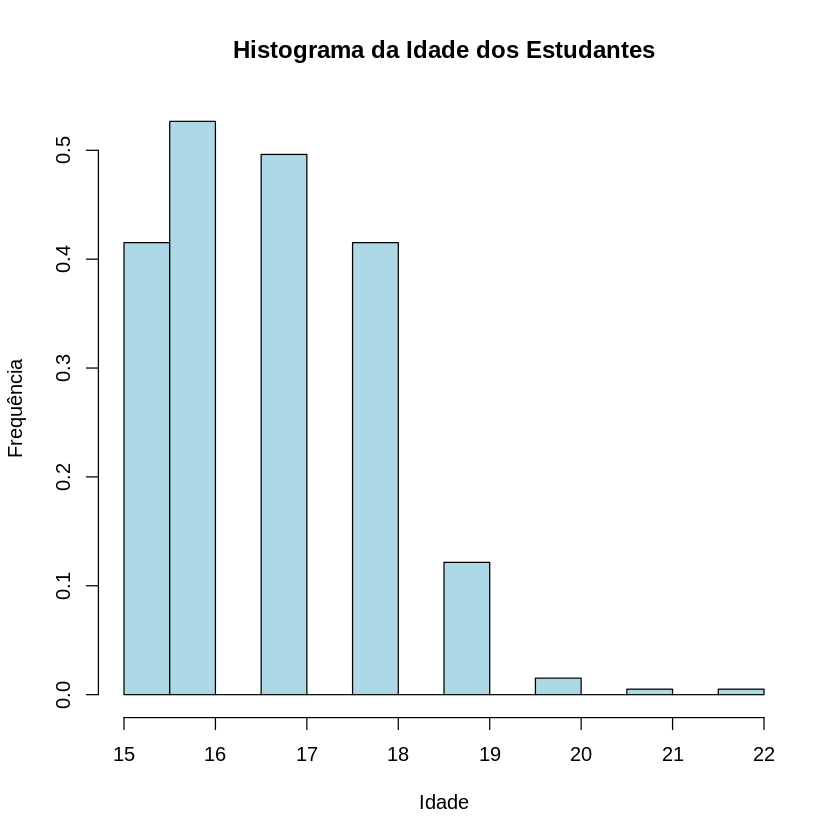

In [ ]:
age <- dados$age
hist(age,
     probability = TRUE,
     main = "Histograma da Idade dos Estudantes",
     xlab = "Idade",
     ylab = "Frequência",
     col = "lightblue",
     border = "black")





##**BOX-PLOT** - variáveis numéricas

-Quanto dos dados estão representados entre o limite inferior e superior? (em %)

No 1º período e na nota final, cerca de 100% dos dados estão representados entre os limites.
O 2º período, por haver um outlier, é necessário fazer o cálculo: (n-1)/n = 394/395 ≈ 0,997, ou seja, 99,7% dos dados estão representados entre os limites.

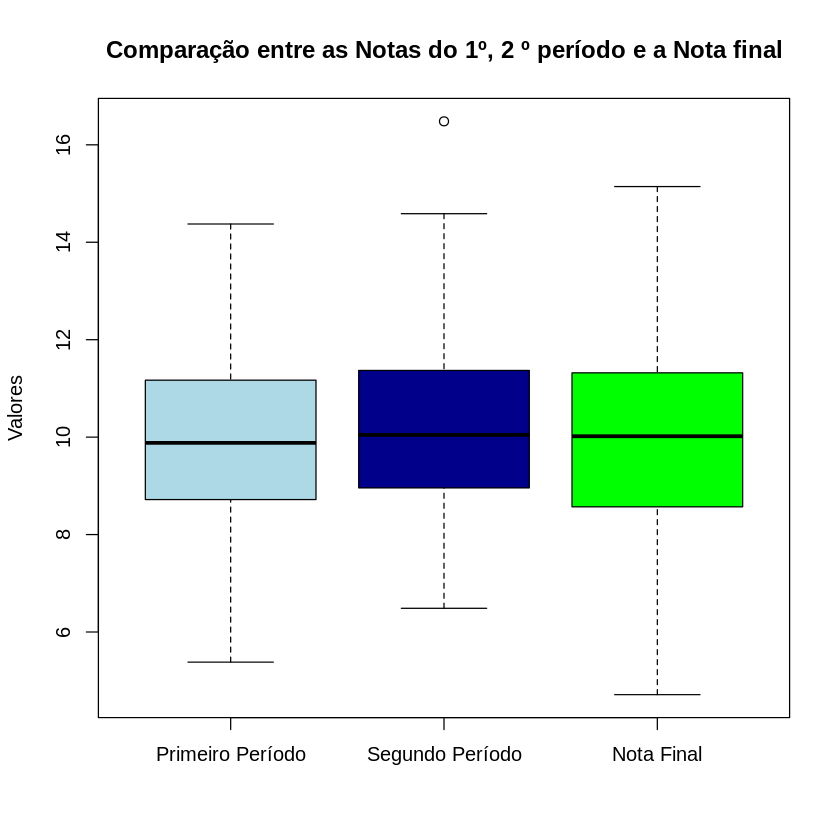

In [ ]:
set.seed(123)
#age <- c(rnorm(150, mean = 10, sd =2) 25,30)
g1 <- c(rnorm(150, mean = 10, sd =2))
g2 <- c(rnorm(150, mean = 10, sd =2))
g3 <- c(rnorm(150, mean = 10, sd=2))

#boxplot
boxplot (g1, g2, g3,
        main= "Comparação entre as Notas do 1º, 2 º período e a Nota final",
        names= c("Primeiro Período", "Segundo Período", "Nota Final"),
        ylab= "Valores",
        col= c("lightblue", "darkblue", "green"),
        border= c("black", "black", "black"),
        notch= F)


##**Tabela Cruzada** (02 variável qualitativa)

In [ ]:
install.packages("knitr")

library(knitr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#criar tabela de frequências absolutas
tabela1 <- table(dados$school, dados$address)
tab_freq_abs <- rbind(
  cbind(tabela1, margin.table(tabela1, 1)),
   c(margin.table(tabela1,2), sum(margin.table(tabela1,1)))
)
#renomear linhas e colunas
#nrow/ncol = garante que o último elemento da dimensão de linha/coluna seja renomeado, independentemente do número de categorias da variável
dimnames(tab_freq_abs)[[1]][nrow(tab_freq_abs)] <- "Total_linha"
dimnames(tab_freq_abs)[[2]][ncol(tab_freq_abs)] <- "Total_coluna"

#mostrar tabela formatada
kable(tab_freq_abs)



|            |  R|   U| Total_coluna|
|:-----------|--:|---:|------------:|
|GP          | 63| 286|          349|
|MS          | 25|  21|           46|
|Total_linha | 88| 307|          395|

In [ ]:
tabela1 <- table(dados$fedu, dados$fjob)
tab_freq_abs <- rbind(
  cbind(tabela1, margin.table(tabela1, 1)),
   c(margin.table(tabela1,2), sum(margin.table(tabela1,1)))
)
dimnames(tab_freq_abs)[[1]][nrow(tab_freq_abs)] <- "Total_linha"
dimnames(tab_freq_abs)[[2]][ncol(tab_freq_abs)] <- "Total_coluna"
kable(tab_freq_abs)



|            | at_home| health| other| services| teacher| Total_coluna|
|:-----------|-------:|------:|-----:|--------:|-------:|------------:|
|nenhuma     |       0|      0|     2|        0|       0|            2|
|primario    |       4|      1|    57|       19|       1|           82|
|5a9         |       9|      3|    69|       34|       0|          115|
|medio       |       3|      3|    58|       35|       1|          100|
|superior    |       4|     11|    31|       23|      27|           96|
|Total_linha |      20|     18|   217|      111|      29|          395|

In [ ]:
tabela1 <- table(dados$higher, dados$studytime)
tab_freq_abs <- rbind(
  cbind(tabela1, margin.table(tabela1, 1)),
   c(margin.table(tabela1,2), sum(margin.table(tabela1,1)))
)
dimnames(tab_freq_abs)[[1]][nrow(tab_freq_abs)] <- "Total_linha"
dimnames(tab_freq_abs)[[2]][ncol(tab_freq_abs)] <- "Total_coluna"
kable(tab_freq_abs)



|            | <2h| 2-5h| 5-10h| >10h| Total_coluna|
|:-----------|---:|----:|-----:|----:|------------:|
|no          |  12|    8|     0|    0|           20|
|yes         |  93|  190|    65|   27|          375|
|Total_linha | 105|  198|    65|   27|          395|

##**Correlação por qui quadrado** - variável qualitativa

In [ ]:
tabela1 <- table(dados$failures, dados$famsup)
chisq.test(tabela1)


	Pearson's Chi-squared test

data:  tabela1
X-squared = 4.6147, df = 3, p-value = 0.2023


In [ ]:
tabela1 <- table(dados$pstatus, dados$guardian)
chisq.test(tabela1)


Warning message in chisq.test(tabela1):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tabela1
X-squared = 4.8831, df = 2, p-value = 0.08702


02 quantitativas discretas -> gráfico de dispersão
cálculo da correlação e teste

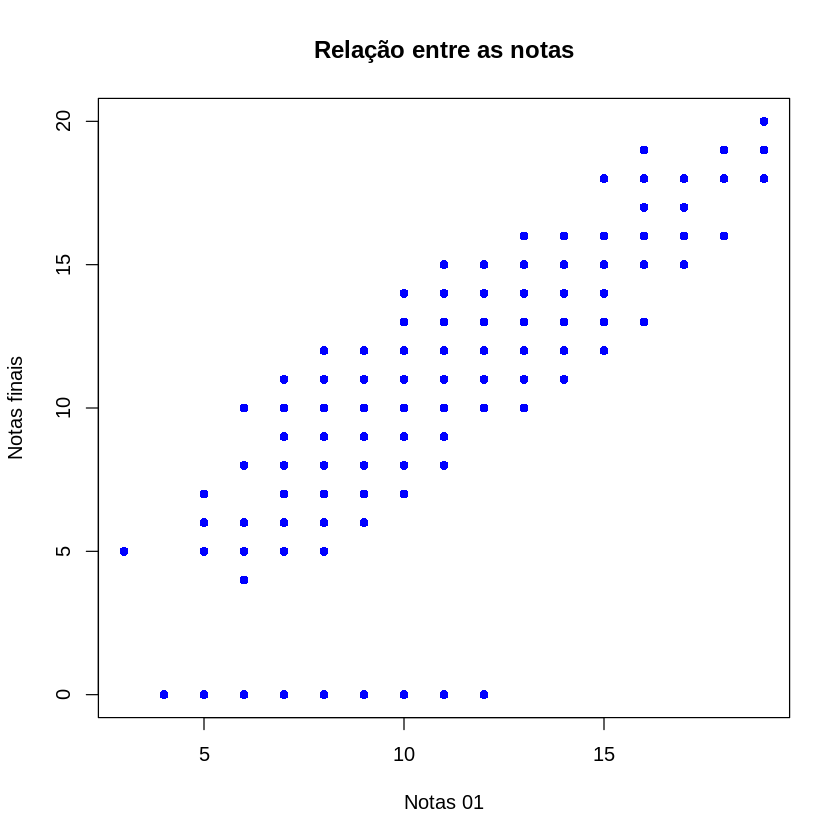

In [ ]:
plot(dados$g1, dados$g3,
     main = "Relação entre as notas",
     xlab = "Notas 01", ylab = "Notas finais",
     pch = 16,
     col = "blue",
     cex = 1.0)

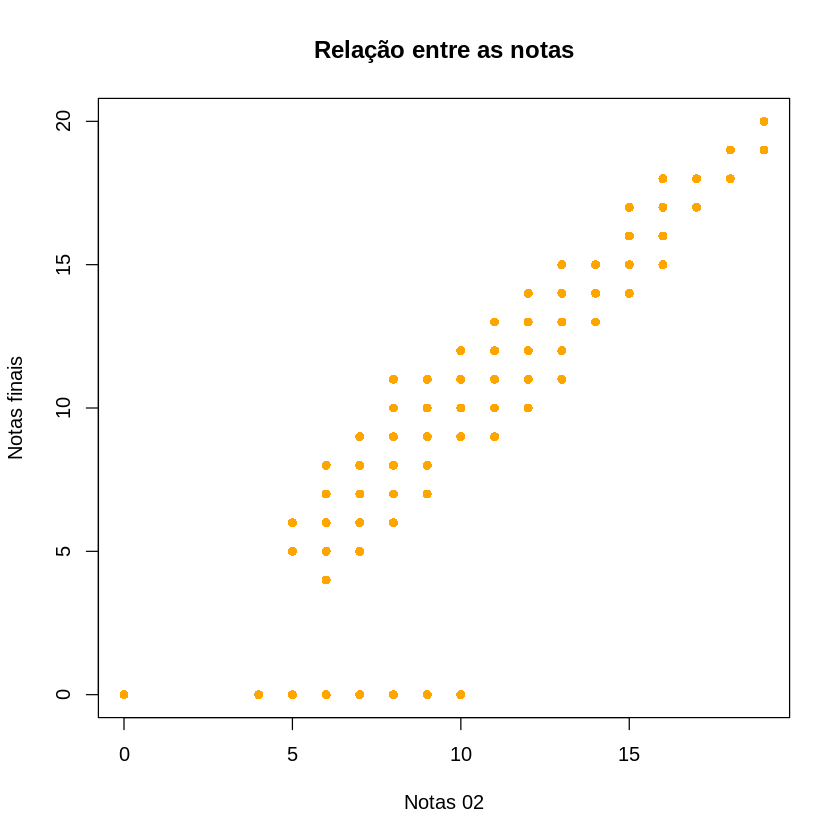

In [ ]:
plot(dados$g2, dados$g3,
     main = "Relação entre as notas",
     xlab = "Notas 02", ylab = "Notas finais",
     pch = 16,
     col = "orange",
     cex = 1.0)

In [ ]:
cor(dados$g2, dados$g3)

cor.test(dados$g2, dados$g3)

[1] 0.904868


	Pearson's product-moment correlation

data:  dados$g2 and dados$g3
t = 42.139, df = 393, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8852345 0.9212830
sample estimates:
     cor 
0.904868 


## **Relação entre qualitativa e quantitativa**

In [ ]:
summary_sal_inetr <- tapply(dados$absences, dados$address, summary)
summary_sal_inetr

$R
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   4.000   6.125   8.000  75.000 

$U
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    4.00    5.59    8.00   56.00 


In [ ]:
summary_sal_inetr <- tapply(dados$fedu, dados$fjob, summary)
summary_sal_inetr

$at_home
 nenhuma primario      5a9    medio superior 
       0        4        9        3        4 

$health
 nenhuma primario      5a9    medio superior 
       0        1        3        3       11 

$other
 nenhuma primario      5a9    medio superior 
       2       57       69       58       31 

$services
 nenhuma primario      5a9    medio superior 
       0       19       34       35       23 

$teacher
 nenhuma primario      5a9    medio superior 
       0        1        0        1       27

In [ ]:
summary_sal_inetr <- tapply(dados$sex, dados$address, summary)
summary_sal_inetr

$R
 F  M 
44 44 

$U
  F   M 
164 143

##**Teste Breusch Pagan**

In [ ]:
install.packages("lmtest")
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(dados)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<ord>,<ord>,<fct>,<fct>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,superior,superior,at_home,teacher,⋯,boa,regular,muito,muito_baixo,muito_baixo,regular,6,5,6,6
2,GP,F,17,U,GT3,T,primario,primario,at_home,other,⋯,excelente,regular,regular,muito_baixo,muito_baixo,regular,4,5,5,6
3,GP,F,15,U,LE3,T,primario,primario,at_home,other,⋯,boa,regular,pouco,baixo,moderado,regular,10,7,8,10
4,GP,F,15,U,GT3,T,superior,5a9,health,services,⋯,regular,pouco,pouco,muito_baixo,muito_baixo,excelente,2,15,14,15
5,GP,F,16,U,GT3,T,medio,medio,other,other,⋯,boa,regular,pouco,muito_baixo,baixo,excelente,4,6,10,10
6,GP,M,16,U,LE3,T,superior,medio,services,other,⋯,excelente,muito,pouco,muito_baixo,baixo,excelente,10,15,15,15


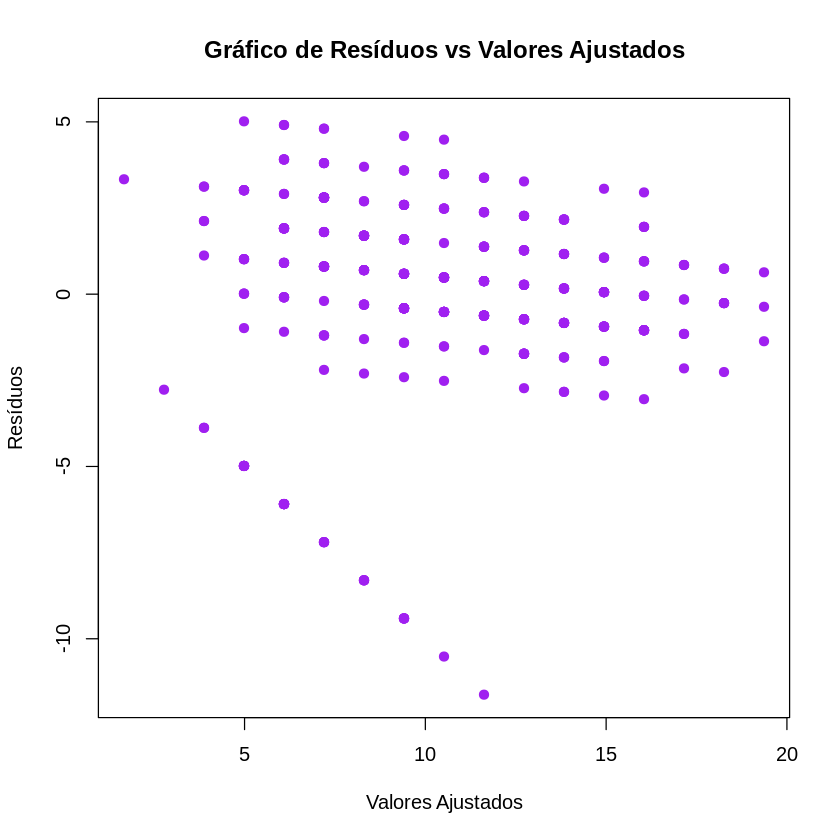

In [ ]:
# Ajustar o modelo de regressão linear
modelo1 <- lm(g3 ~ g1, data = dados)

# Extrair resíduos e valores ajustados
valores_ajustados <- fitted(modelo1)
residuos <- resid(modelo1)

# Criar o gráfico de resíduos vs valores ajustados
plot(valores_ajustados, residuos,
     main = "Gráfico de Resíduos vs Valores Ajustados",
     xlab = "Valores Ajustados",
     ylab = "Resíduos",
     pch = 19,
     col = "purple")



In [ ]:
# Ajustar o modelo
library(lmtest)
modelo1 <- lm(g3 ~ g1, data = dados)

# Teste de Breusch-Pagan
bptest(modelo1)



	studentized Breusch-Pagan test

data:  modelo1
BP = 25.761, df = 1, p-value = 3.865e-07


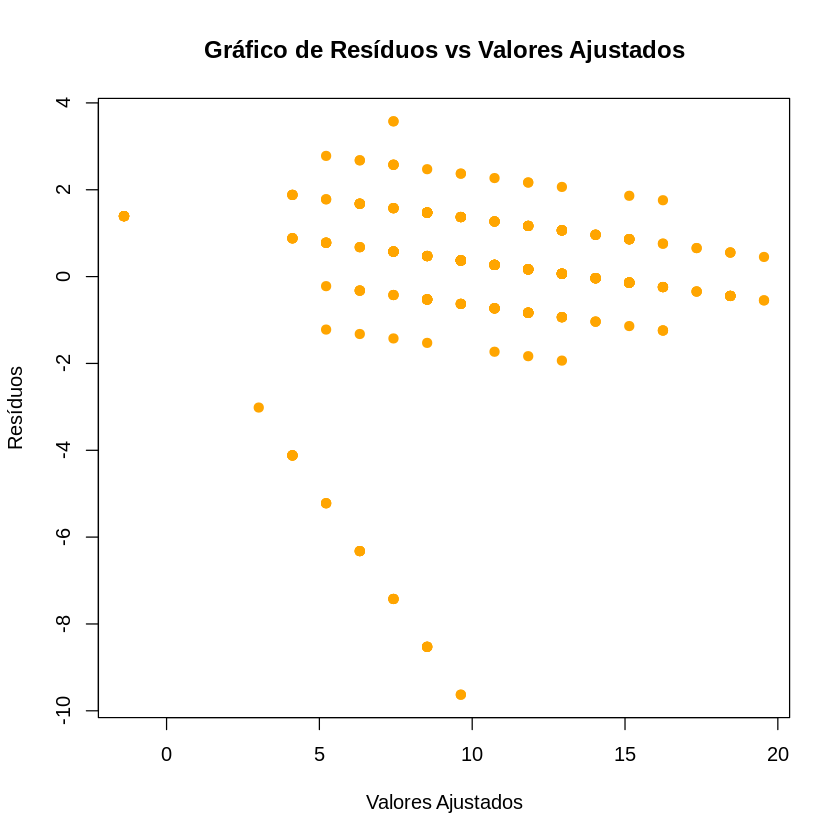

In [ ]:
# Ajustar o modelo de regressão linear
modelo2 <- lm(g3 ~ g2, data = dados)

# Extrair resíduos e valores ajustados
valores_ajustados <- fitted(modelo2)
residuos <- resid(modelo2)

# Criar o gráfico de resíduos vs valores ajustados
plot(valores_ajustados, residuos,
     main = "Gráfico de Resíduos vs Valores Ajustados",
     xlab = "Valores Ajustados",
     ylab = "Resíduos",
     pch = 19,
     col = "orange")



In [ ]:
# Ajustar o modelo
library(lmtest)
modelo2 <- lm(g3 ~ g2, data = dados)

# Teste de Breusch-Pagan
bptest(modelo2)


	studentized Breusch-Pagan test

data:  modelo2
BP = 15.01, df = 1, p-value = 0.0001069


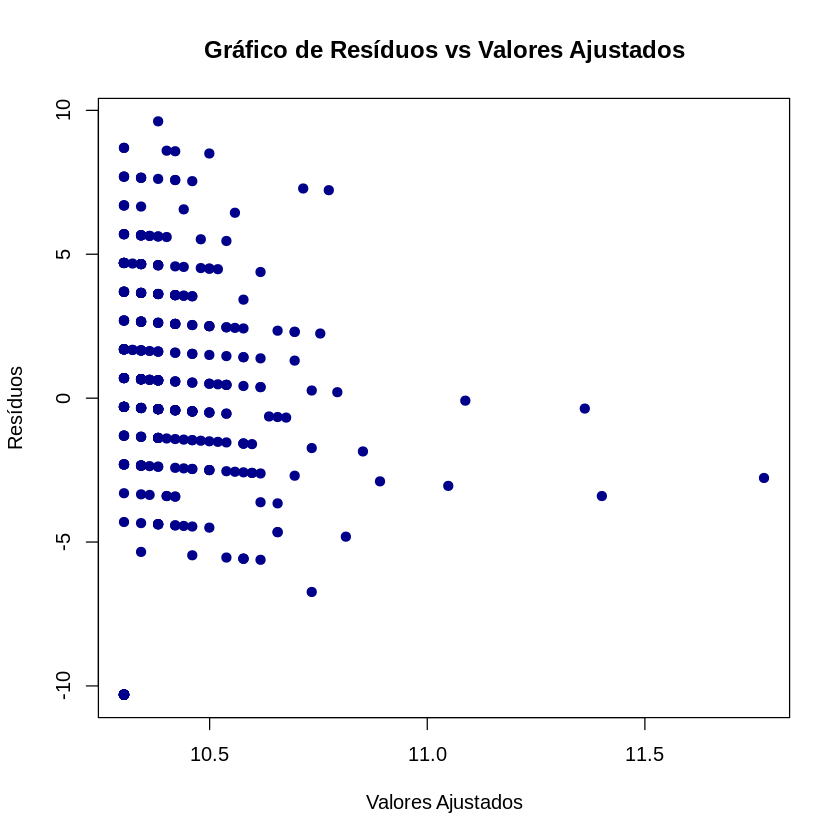

In [ ]:
# Ajustar o modelo de regressão linear
modelo3 <- lm(g3 ~ absences, data = dados)

# Extrair resíduos e valores ajustados
valores_ajustados <- fitted(modelo3)
residuos <- resid(modelo3)

# Criar o gráfico de resíduos vs valores ajustados
plot(valores_ajustados, residuos,
     main = "Gráfico de Resíduos vs Valores Ajustados",
     xlab = "Valores Ajustados",
     ylab = "Resíduos",
     pch = 19,
     col = "dark blue")



In [ ]:
# Ajustar o modelo
library(lmtest)
modelo3 <- lm(g3 ~ absences, data = dados)

# Teste de Breusch-Pagan
bptest(modelo3)


	studentized Breusch-Pagan test

data:  modelo3
BP = 21.052, df = 1, p-value = 4.469e-06


##**Variancia dos Erros**

In [ ]:
res <- resid(modelo1)
cor(res^2, dados$g1)
modelo_erros_1 <- lm(res^2 ~ g1, data = dados)


[1] -0.2553757

In [ ]:
modelo1_var <- lm(log(res^2) ~ g1, data = dados)
var_estimada1 <- exp(fitted(modelo1_var))
weights1 <- 1/var_estimada1


In [ ]:
res <- resid(modelo2)
cor(res^2, dados$g2)
modelo_erros_2 <- lm(res^2 ~ g2, data = dados)

[1] -0.1949368

In [ ]:
modelo2_var <- lm(log(res^2) ~ g2, data = dados)
var_estimada2 <- exp(fitted(modelo2_var))
weights2 <- 1/var_estimada2


##**Função Lm e Regressão Linear**

In [ ]:
x <- dados$g1
y <- dados$g3

modelo_sem_peso1 <- lm(y ~ x, data = dados)
modelo_sem_peso1

modelo_com_peso1 <- lm(y ~ x, data = dados, weights = weights1)
modelo_com_peso1





Call:
lm(formula = y ~ x, data = dados)

Coefficients:
(Intercept)            x  
     -1.653        1.106  



Call:
lm(formula = y ~ x, data = dados, weights = weights1)

Coefficients:
(Intercept)            x  
     -1.237        1.073  


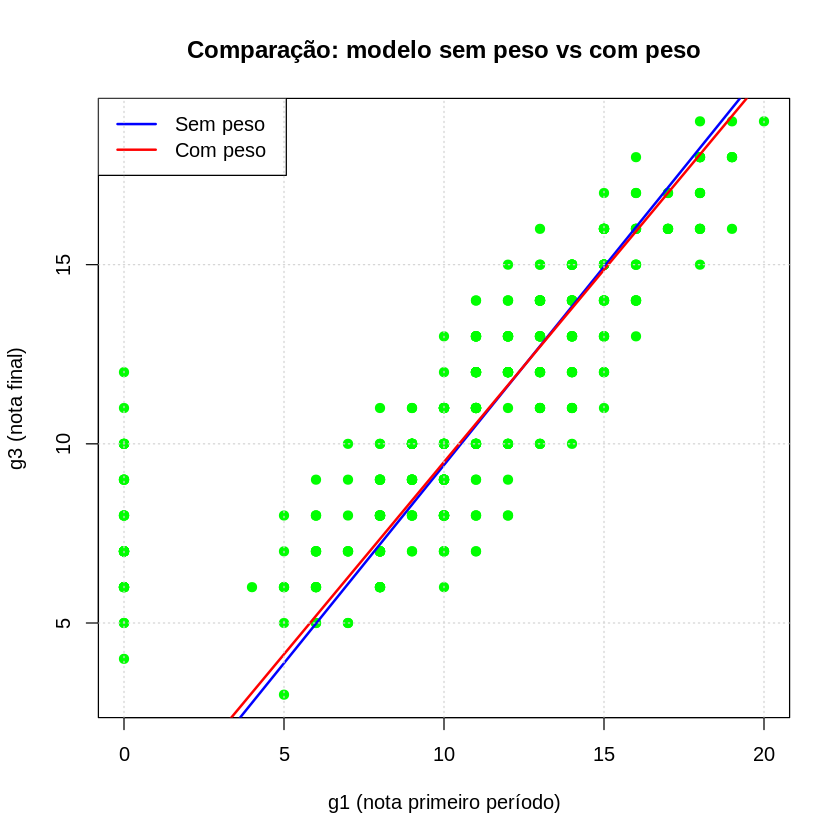

In [ ]:
plot(dados$g3, dados$g1,
     main = "Comparação: modelo sem peso vs com peso",
     ylab = "g3 (nota final)",
     xlab = "g1 (nota primeiro período)",
     pch = 19, col = "green")
abline(modelo_sem_peso1, col = "blue", lwd = 2)
abline(modelo_com_peso1, col = "red", lwd = 2)
legend("topleft", legend = c("Sem peso", "Com peso"),
       col = c("blue", "red"), lwd = 2)
grid()

In [ ]:
x <- dados$g2
y <- dados$g3

modelo_sem_peso2 <- lm(y ~ x, data = dados)
modelo_sem_peso2

modelo_com_peso2 <- lm(y ~ x, data = dados, weights = weights2)
modelo_com_peso2





Call:
lm(formula = y ~ x, data = dados)

Coefficients:
(Intercept)            x  
     -1.393        1.102  



Call:
lm(formula = y ~ x, data = dados, weights = weights2)

Coefficients:
(Intercept)            x  
     -1.175        1.087  


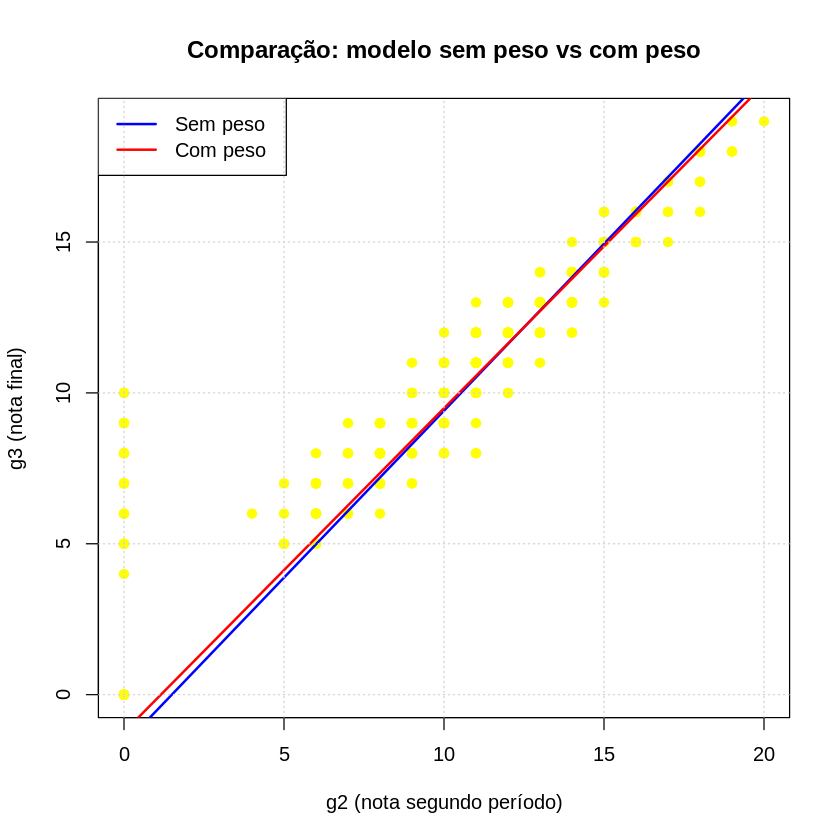

In [ ]:
plot(dados$g3, dados$g2,
     main = "Comparação: modelo sem peso vs com peso",
     ylab = "g3 (nota final)",
     xlab = "g2 (nota segundo período)",
     pch = 19, col = "yellow")
abline(modelo_sem_peso1, col = "blue", lwd = 2)
abline(modelo_com_peso1, col = "red", lwd = 2)
legend("topleft", legend = c("Sem peso", "Com peso"),
       col = c("blue", "red"), lwd = 2)
grid()

In [ ]:
#Regressão múltipla
x1 <- dados$g1
x2 <- dados$g2
y <- dados$g3

modelo <- lm(formula = y ~ x1 + x2, data = dados)
modelo


Call:
lm(formula = y ~ x1 + x2, data = dados)

Coefficients:
(Intercept)           x1           x2  
    -1.8300       0.1533       0.9869  


##**Regressão Logística**

In [ ]:
head(dados)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,freetime,goout,dalc,walc,health,absences,g1,g2,g3,g3Bin
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,3,4,1,1,3,6,5,6,6,0
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,3,3,1,1,3,4,5,5,6,0
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,3,2,2,3,3,10,7,8,10,1
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,2,2,1,1,5,2,15,14,15,1
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,3,2,1,2,5,4,6,10,10,1
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,4,2,1,2,5,10,15,15,15,1


In [ ]:
install.packages(c("caret", "MASS", "fastDummies"), repos = "https://cloud.r-project.org")
library(caret)
library(MASS)         # stepAIC
library(fastDummies)  # se houver fatores para dummies

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
dados$G3_bin <- as.integer(dados$G3 > 10)
sum(dados$G3_bin == 1)/200

[1] 1.045

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#exam_score -> target (dependente). Nota >= 35, aprovado (1) e < 35, reprovado (0)
dados$G3_bin <- as.integer(dados$G3 >= 10)

#exclui as colunas que não serão usadas na predição
dados_model <- subset(dados, select = -c(G1, G2, G3))

In [ ]:
#remove e conta as linhas com NA (valor ausente)
sum(is.na(dados_model))
dados_model <- na.omit(dados_model)

[1] 0

In [ ]:
#confere cada coluna se temm valores numericos, se tiver, elas são true
num_cols <- sapply(dados_model, is.numeric)

#não classifica a exam_bin porque é nossa target
num_cols["G3_bin"] <- FALSE  # não escalar a target

#pega as variáveis = true (preditoras) e padroniza, desvio=1 e a média=0
dados_model[num_cols] <- scale(dados_model[num_cols])

In [ ]:
#separa os dados em treino (80%) e teste (20%)
set.seed(123) #garante que a divisão será sempre a mesma
idx <- createDataPartition(dados_model$G3_bin, p = 0.8, list = FALSE)
dados_treino <- dados_model[idx, ]
dados_teste  <- dados_model[-idx, ]

In [ ]:
modelo_inicial <- glm(G3_bin ~ . - G3_bin, data = dados_treino, family = binomial(link = "logit"))

In [ ]:
summary(modelo_inicial)


Call:
glm(formula = G3_bin ~ . - G3_bin, family = binomial(link = "logit"), 
    data = dados_treino)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.56036    1.35676   0.413  0.67960    
schoolMS          0.23989    0.55787   0.430  0.66718    
sexM              0.47247    0.36998   1.277  0.20159    
age              -0.33944    0.20485  -1.657  0.09751 .  
addressU          0.27831    0.39116   0.711  0.47678    
famsizeLE3        0.36685    0.35147   1.044  0.29660    
PstatusT         -0.31871    0.54325  -0.587  0.55742    
Medu              0.17247    0.25728   0.670  0.50263    
Fedu              0.04488    0.20804   0.216  0.82919    
Mjobhealth       -0.16863    0.78805  -0.214  0.83056    
Mjobother        -0.62904    0.49004  -1.284  0.19926    
Mjobservices     -0.12585    0.54710  -0.230  0.81806    
Mjobteacher      -1.36950    0.73434  -1.865  0.06219 .  
Fjobhealth       -0.31458    0.93061  -0.338  0.73534    
Fjobother   

In [ ]:
stepwise_aic <- function(Xdata, resp_name = "G3_bin", verbose = TRUE) {
  y <- Xdata[[resp_name]]
  X <- Xdata[names(Xdata) != resp_name]
  dados <- data.frame(y = y, X)
  formula_nula <- as.formula("y ~ 1")
  formula_completa <- as.formula(paste("y ~", paste(names(X), collapse = " + ")))
  modelo_step <- step(glm(formula_nula, data = dados, family = binomial),
                      scope = list(lower = formula_nula, upper = formula_completa),
                      direction = "both", trace = ifelse(verbose, 1, 0))
  return(modelo_step)
}

modelo_final <- stepwise_aic(dados_treino, resp_name = "G3_bin", verbose = TRUE)
summary(modelo_final)

Start:  AIC=391.72
y ~ 1

             Df Deviance    AIC
+ failures    1   350.67 354.67
+ higher      1   381.18 385.18
+ absences    1   381.45 385.45
+ goout       1   381.82 385.82
+ paid        1   384.47 388.47
+ studytime   1   384.47 388.47
+ age         1   384.77 388.77
+ schoolsup   1   384.83 388.83
+ Medu        1   385.55 389.55
+ romantic    1   386.04 390.04
+ address     1   386.54 390.54
+ Fedu        1   386.60 390.60
+ health      1   387.16 391.16
<none>            389.72 391.72
+ famrel      1   387.94 391.94
+ traveltime  1   388.21 392.21
+ famsup      1   388.29 392.29
+ Walc        1   388.33 392.33
+ Dalc        1   388.97 392.97
+ nursery     1   389.06 393.06
+ famsize     1   389.14 393.14
+ sex         1   389.20 393.20
+ Pstatus     1   389.32 393.32
+ internet    1   389.42 393.42
+ activities  1   389.65 393.65
+ school      1   389.71 393.71
+ freetime    1   389.72 393.72
+ guardian    2   389.09 395.09
+ Mjob        4   386.15 396.15
+ Fjob        


Call:
glm(formula = y ~ failures + absences + schoolsup + goout + nursery + 
    higher + famsup + studytime, family = binomial, data = dados)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.7901     0.7298   1.083   0.2789    
failures      -0.7857     0.1645  -4.778 1.77e-06 ***
absences      -0.2750     0.1251  -2.198   0.0279 *  
schoolsupyes  -0.9982     0.3952  -2.526   0.0115 *  
goout         -0.2361     0.1383  -1.707   0.0878 .  
nurseryyes    -0.5800     0.3770  -1.539   0.1239    
higheryes      1.0319     0.7020   1.470   0.1416    
famsupyes     -0.4615     0.2981  -1.548   0.1216    
studytime      0.2064     0.1464   1.410   0.1585    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 389.72  on 315  degrees of freedom
Residual deviance: 326.75  on 307  degrees of freedom
AIC: 344.75

Number of Fisher Scoring iterations: 4


In [ ]:
probs_test <- predict(modelo_final, newdata = dados_teste, type = "response")
pred_test  <- ifelse(probs_test > 0.5, 1, 0) #preve aprovado (1) e reprovado (0)

In [ ]:
conf_mat <- table(Real = dados_teste$G3_bin, Predito = pred_test)
conf_mat
accuracy <- sum(diag(conf_mat)) / sum(conf_mat)
precision <- ifelse(sum(conf_mat[,2])==0, NA, conf_mat[2,2] / sum(conf_mat[,2]))
recall <- ifelse(sum(conf_mat[2,])==0, NA, conf_mat[2,2] / sum(conf_mat[2,]))
list(confusion_matrix = conf_mat, accuracy = accuracy, precision = precision, recall = recall)

    Predito
Real  0  1
   0 10 23
   1  5 41

$confusion_matrix
    Predito
Real  0  1
   0 10 23
   1  5 41

$accuracy
[1] 0.6455696

$precision
[1] 0.640625

$recall
[1] 0.8913043


In [ ]:
coefs <- summary(modelo_final)$coefficients
odds_ratios <- exp(coefs[, "Estimate"])
cbind(coefs, OddsRatio = odds_ratios)

,Estimate,Std. Error,z value,Pr(>|z|),OddsRatio
(Intercept),0.7901021,0.7297547,1.082696,2.789436e-01,2.2036215
failures,-0.7857145,0.1644509,-4.777807,1.772174e-06,0.4557939
absences,-0.2749865,0.1250856,-2.198386,2.792163e-02,0.7595824
schoolsupyes,-0.9981981,0.3952295,-2.525616,1.154956e-02,0.3685429
goout,-0.2361077,0.1383284,-1.706864,8.784742e-02,0.7896956
nurseryyes,-0.5800174,0.3769866,-1.538562,1.239112e-01,0.5598886
higheryes,1.0319142,0.7020119,1.469938,1.415785e-01,2.8064328
famsupyes,-0.4614626,0.2980745,-1.548145,1.215874e-01,0.6303610
studytime,0.2064402,0.1463806,1.410298,1.584516e-01,1.2292943


In [ ]:
summary(modelo_final)


Call:
glm(formula = y ~ failures + absences + schoolsup + goout + nursery + 
    higher + famsup + studytime, family = binomial, data = dados)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.7901     0.7298   1.083   0.2789    
failures      -0.7857     0.1645  -4.778 1.77e-06 ***
absences      -0.2750     0.1251  -2.198   0.0279 *  
schoolsupyes  -0.9982     0.3952  -2.526   0.0115 *  
goout         -0.2361     0.1383  -1.707   0.0878 .  
nurseryyes    -0.5800     0.3770  -1.539   0.1239    
higheryes      1.0319     0.7020   1.470   0.1416    
famsupyes     -0.4615     0.2981  -1.548   0.1216    
studytime      0.2064     0.1464   1.410   0.1585    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 389.72  on 315  degrees of freedom
Residual deviance: 326.75  on 307  degrees of freedom
AIC: 344.75

Number of Fisher Scoring iterations: 4


# **Árvore de Decisão**

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(dados)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<ord>,<ord>,<fct>,<fct>,⋯,<ord>,<ord>,<int>,<ord>,<ord>,<ord>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,superior,superior,at_home,teacher,⋯,boa,regular,4,muito_baixo,muito_baixo,regular,6,5,6,6
2,GP,F,17,U,GT3,T,primario,primario,at_home,other,⋯,excelente,regular,3,muito_baixo,muito_baixo,regular,4,5,5,6
3,GP,F,15,U,LE3,T,primario,primario,at_home,other,⋯,boa,regular,2,baixo,moderado,regular,10,7,8,10
4,GP,F,15,U,GT3,T,superior,5a9,health,services,⋯,regular,pouco,2,muito_baixo,muito_baixo,excelente,2,15,14,15
5,GP,F,16,U,GT3,T,medio,medio,other,other,⋯,boa,regular,2,muito_baixo,baixo,excelente,4,6,10,10
6,GP,M,16,U,LE3,T,superior,medio,services,other,⋯,excelente,muito,2,muito_baixo,baixo,excelente,10,15,15,15


In [ ]:
head(dados$studytime)

[1] 2 2 2 3 2 2

1 
11.225

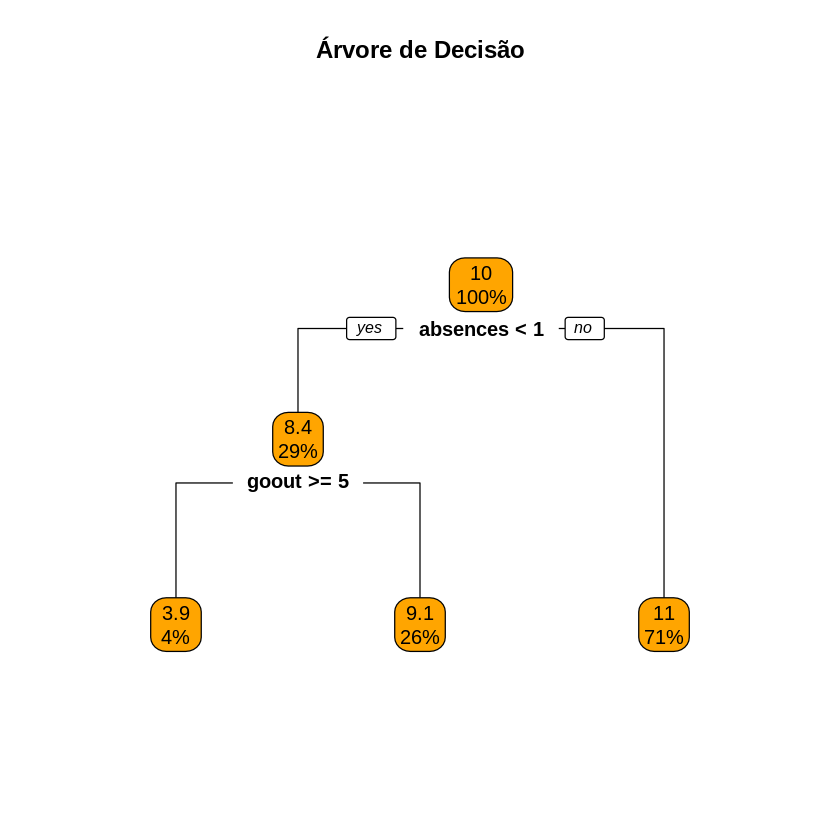

In [ ]:
# Criar o modelo de árvore de decisão com CP ajustado pelo R
modelo <- rpart(
  g3 ~ absences + goout + studytime,
  data = dados,
  method = "anova",                # class = classificação
      # usa o índice de Gini, "information"
  control = rpart.control(cp = best_cp, minsplit = 20, minbucket = 7)
)

rpart.plot(
  modelo,
  box.palette = "orange",
  main = "Árvore de Decisão"
)

novo_estudante <- data.frame(
  absences = 10,
  goout = 3,
  studytime = 3
)
previsao <- predict(modelo, novo_estudante)
previsao


Regression tree:
rpart(formula = g3 ~ absences + goout + studytime, data = dados, 
    method = "anova", control = rpart.control(cp = 0.005, minsplit = 20, 
        minbucket = 7))

Variables actually used in tree construction:
[1] absences  goout     studytime

Root node error: 8269.9/395 = 20.936

n= 395 

         CP nsplit rel error  xerror     xstd
1 0.0762646      0   1.00000 1.00554 0.077993
2 0.0405448      1   0.92374 0.95518 0.063733
3 0.0152403      2   0.88319 0.93787 0.065425
4 0.0094934      3   0.86795 0.94937 0.066062
5 0.0076288      4   0.85846 0.96194 0.066879
6 0.0050000      7   0.83557 0.94666 0.066553


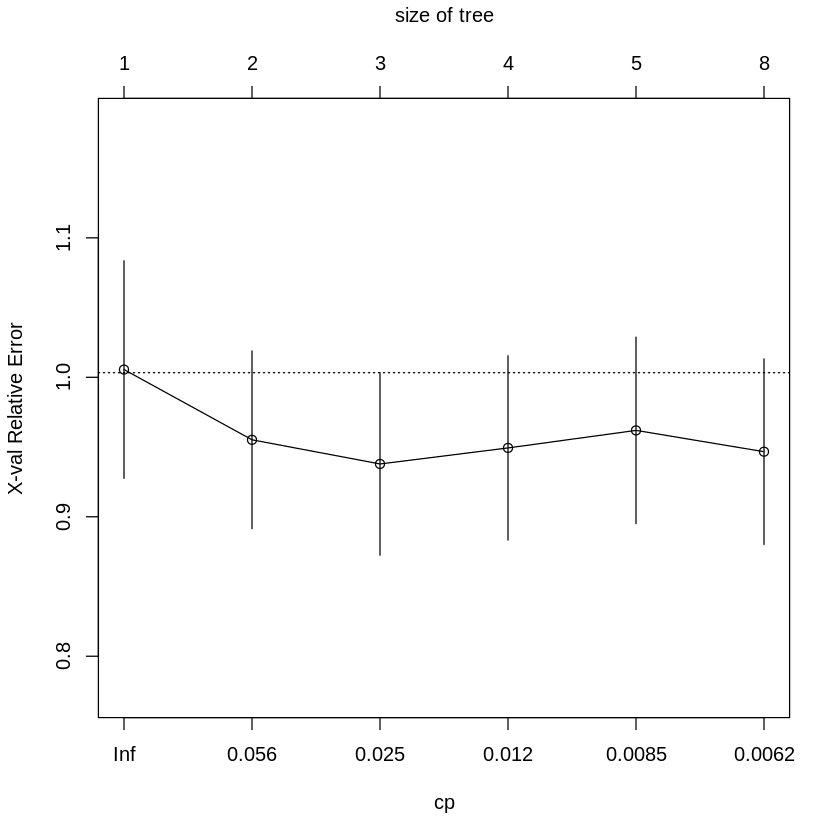

In [ ]:
#codigo para ver o melhor ajuste de cp
printcp(modelo)
plotcp(modelo)



In [ ]:
best_cp <- modelo$cptable[which.min(modelo$cptable[, "xerror"]), "CP"]


1 
12.37288

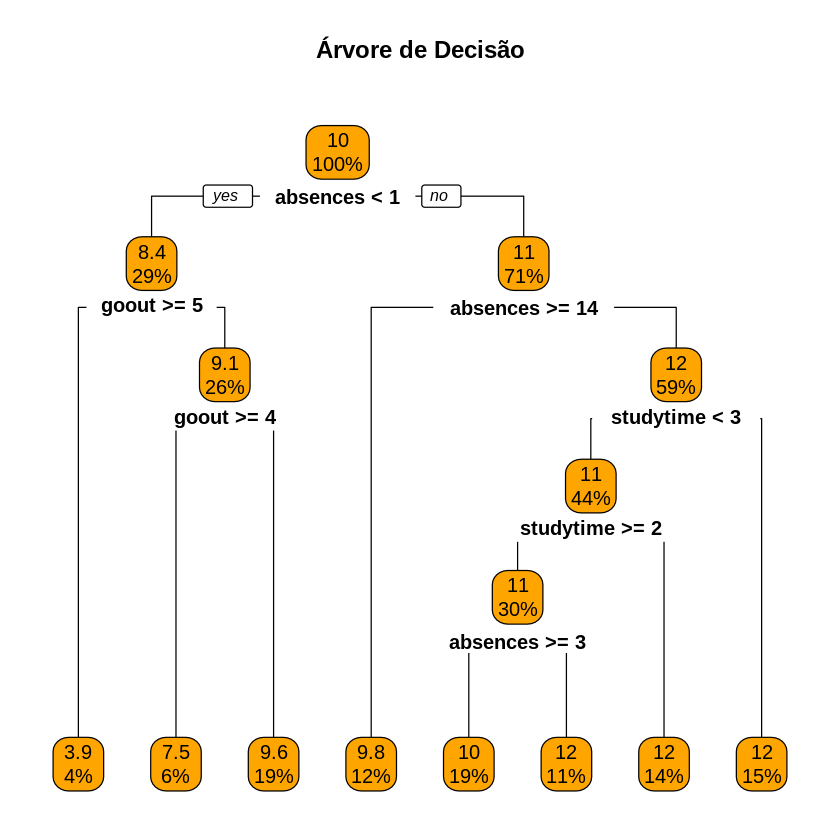

In [ ]:
# Criar o modelo de árvore de decisão com CP ajustado MANUALMENTE
modelo <- rpart(
  g3 ~ absences + goout + studytime,
  data = dados,
  method = "anova",                # class = classificação
      # usa o índice de Gini, "information"
  control = rpart.control(cp = 0.005, minsplit = 20, minbucket = 7)
)

rpart.plot(
  modelo,
  box.palette = "orange",
  main = "Árvore de Decisão"
)

novo_estudante <- data.frame(
  absences = 10,
  goout = 3,
  studytime = 3
)
previsao <- predict(modelo, novo_estudante)
previsao

# **KNN**

In [ ]:
install.packages("caret")
install.packages("dplyr")

library(caret)
library(dplyr)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘recipes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
# Criar variável-alvo categórica (classificação)
dados$Desempenho <- ifelse(dados$G3 <= 10, "Baixo desempenho", "Alto desempenho")
dados$Desempenho <- as.factor(dados$Desempenho)

dados_num <- dados %>%
  select(G1, G2, absences, studytime, failures, Desempenho)



In [ ]:
set.seed(123)

treino <- createDataPartition(dados_num$Desempenho, p = 0.7, list = FALSE)

train <- dados_num[treino, ]
test  <- dados_num[-treino, ]


In [ ]:
set.seed(123)

treino <- createDataPartition(dados_num$Desempenho, p = 0.7, list = FALSE)

train <- dados_num[treino, ]
test  <- dados_num[-treino, ]

knn_model <- train(
  Desempenho ~ .,
  data = train,
  method = "knn",
  trControl = trainControl(method = "cv"),  # validação cruzada (10-fold)
  tuneGrid = expand.grid(k = 1:10),         # testar k de 1 a 10
  metric = "Accuracy"
)

knn_model

k-Nearest Neighbors 

278 samples
  5 predictor
  2 classes: 'Alto desempenho', 'Baixo desempenho' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 250, 251, 250, 250, 250, 249, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9027413  0.8052683
   2  0.9096378  0.8187619
   3  0.9206167  0.8409830
   4  0.9207490  0.8410103
   5  0.9241972  0.8480870
   6  0.9206258  0.8412937
   7  0.9208812  0.8415910
   8  0.9136061  0.8269838
   9  0.9208812  0.8415910
  10  0.9174421  0.8353328

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

In [ ]:
pred <- predict(knn_model, test)
confusionMatrix(pred, test$Desempenho)

Confusion Matrix and Statistics

                  Reference
Prediction         Alto desempenho Baixo desempenho
  Alto desempenho               58                5
  Baixo desempenho               4               50
                                         
               Accuracy : 0.9231         
                 95% CI : (0.859, 0.9642)
    No Information Rate : 0.5299         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8454         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9355         
            Specificity : 0.9091         
         Pos Pred Value : 0.9206         
         Neg Pred Value : 0.9259         
             Prevalence : 0.5299         
         Detection Rate : 0.4957         
   Detection Prevalence : 0.5385         
      Balanced Accuracy : 0.9223         
                           